In [1505]:
import numpy as np
import sympy as sp
from matplotlib.pyplot import plot, show, rc, legend, xticks

In [1506]:
rc('font', size=16); rc('font', family='SimHei')

In [1507]:
# x0 = np.array([25723, 30379, 34473, 38485, 40514, 42400, 48337])
x0 = np.array([0.82, 1.28, 1.7642, 7.48, 33.11, 50.7, 77.7, 125.6, 120.6, 136.7, 352.1, 606.7])
# x0 = np.array([0.7,1.1,3,12,42,91.28,153.4,260.78,380.87,492.02,784,1310])
# x0 = np.array([0.1,0.2,0.2,0.3,0.7,1,1.4,2.2,2.4,4,6,8])

In [1508]:
n = len(x0)

# 求级比的容许范围
bd2 = [np.exp(-2 / (n + 1)), np.exp(2 / (n + 1))]
print(bd2)

[0.8574039191604412, 1.16631144044593]


In [1509]:
# 求级比
jibi = x0[:-1] / x0[1:]
print(jibi)

[0.640625   0.72554132 0.23585561 0.22591362 0.6530572  0.65250965
 0.61863057 1.04145937 0.88222385 0.38824198 0.58035273]


In [1510]:
# 求级比范围
bd1 = [jibi.min(), jibi.max()]
print(bd1)

[0.22591362126245848, 1.0414593698175787]


In [1511]:
c = 0

# 超出可容覆盖范围之内
if(bd1[0] < bd2[0] or bd1[1] > bd2[1]):
    e = np.hstack((( bd2[0] * x0[1:] - x0[:-1] ) / (1 - bd2[0]), ( x0[:-1] - bd2[1] * x0[1:] ) / (bd2[1] - 1) ))
    
    c = int(e.max()) + 1
    print(c)

1179


In [1512]:
print("x0: ", x0)
y0 = x0 + c
print("y0: ", y0)

x0:  [  0.82     1.28     1.7642   7.48    33.11    50.7     77.7    125.6
 120.6    136.7    352.1    606.7   ]
y0:  [1179.82   1180.28   1180.7642 1186.48   1212.11   1229.7    1256.7
 1304.6    1299.6    1315.7    1531.1    1785.7   ]


In [1513]:
# 求级比
new_jibi = y0[:-1] / y0[1:]
print(new_jibi)

[0.99961026 0.99958993 0.99518256 0.97885505 0.9856957  0.97851516
 0.96328377 1.00384734 0.98776317 0.85931683 0.85742286]


In [1514]:
# 求级比范围
bd3 = [new_jibi.min(), new_jibi.max()]
print("new_jibi: ", bd3)

print("target_jibi: ", bd2)

new_jibi:  [0.857422859382875, 1.0038473376423516]
target_jibi:  [0.8574039191604412, 1.16631144044593]


In [1515]:
# 求累加序列
x1 = np.cumsum(y0)
print(x1)

alpha = 0.5

z = alpha * x1[:-1] + (1 - alpha) * x1[1:]
print(z)

[ 1179.82    2360.1     3540.8642  4727.3442  5939.4542  7169.1542
  8425.8542  9730.4542 11030.0542 12345.7542 13876.8542 15662.5542]
[ 1769.96    2950.4821  4134.1042  5333.3992  6554.3042  7797.5042
  9078.1542 10380.2542 11687.9042 13111.3042 14769.7042]


In [1516]:
B = np.vstack([-z, np.ones(n - 1)]).T
print(B)

[[-1.76996000e+03  1.00000000e+00]
 [-2.95048210e+03  1.00000000e+00]
 [-4.13410420e+03  1.00000000e+00]
 [-5.33339920e+03  1.00000000e+00]
 [-6.55430420e+03  1.00000000e+00]
 [-7.79750420e+03  1.00000000e+00]
 [-9.07815420e+03  1.00000000e+00]
 [-1.03802542e+04  1.00000000e+00]
 [-1.16879042e+04  1.00000000e+00]
 [-1.31113042e+04  1.00000000e+00]
 [-1.47697042e+04  1.00000000e+00]]


In [1517]:
# 最小二乘法拟合参数
u = np.linalg.pinv(B)@y0[1:]
print(u)

[-3.68781947e-02  1.02303805e+03]


In [1518]:
# 定义符号变量和函数
sp.var('t'); sp.var('x', cls = sp.Function)

x

In [1519]:
# 定义符号微分方程
eq = x(t).diff(t) + u[0] * x(t) - u[1]

In [1520]:
# 求解符号微分方程
xt = sp.dsolve(eq, ics = {x(0) : y0[0]})
print(xt)

Eq(x(t), 28920.8213625762*exp(0.0368781947480898*t) - 27741.0013625762)


In [1521]:
# 提取方程中的符号解
xt = xt.args[1]
print(xt)

28920.8213625762*exp(0.0368781947480898*t) - 27741.0013625762


In [1522]:
# 转换为匿名函数
xt = sp.lambdify(t, xt, 'numpy')
print(xt)

<function _lambdifygenerated at 0x799f5e88d7e0>


In [1523]:
s = 2011 # 起始年份
k = 10 # 预测未来k年

t = np.arange(n + k)
print(t)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [1524]:
# 求模型的预测值
xt1 = xt(t)
print(xt1)

[ 1179.82        2266.27785546  3393.55027344  4563.1705196
  5776.72945922  7035.87772102  8342.3279423   9697.85709837
 11104.30891952 12563.59639876 14077.70439383 15648.69232687
 17278.69698559 18969.9354296  20724.70800599 22545.40147814
 24434.49227208 26394.54984483 28428.24017927 30538.32941025
 32727.68758702 34999.29257691]


In [1525]:
# 还原数据
x0_pred = np.hstack([y0[0], np.diff(xt1)])

x0_pred = x0_pred - c

print(x0_pred)

[ 8.20000000e-01 -9.25421445e+01 -5.17275820e+01 -9.37975384e+00
  3.45589396e+01  8.01482618e+01  1.27450221e+02  1.76529156e+02
  2.27451821e+02  2.80287479e+02  3.35107995e+02  3.91987933e+02
  4.51004659e+02  5.12238444e+02  5.75772576e+02  6.41693472e+02
  7.10090794e+02  7.81057573e+02  8.54690334e+02  9.31089231e+02
  1.01035818e+03  1.09260499e+03]


In [1526]:
cha = x0 - x0_pred[:-k] # 残差
delta = np.abs(cha / x0) * 100
print(delta)

[7.75802187e-12 7.32985504e+03 3.03207017e+03 2.25397779e+02
 4.37613898e+00 5.80833566e+01 6.40285988e+01 4.05486911e+01
 8.86001834e+01 1.05038390e+02 4.82590313e+00 3.53901544e+01]


In [1527]:
print(f"{s} - {s + n - 1 + k}的预测值：\n{x0_pred}")

2011 - 2032的预测值：
[ 8.20000000e-01 -9.25421445e+01 -5.17275820e+01 -9.37975384e+00
  3.45589396e+01  8.01482618e+01  1.27450221e+02  1.76529156e+02
  2.27451821e+02  2.80287479e+02  3.35107995e+02  3.91987933e+02
  4.51004659e+02  5.12238444e+02  5.75772576e+02  6.41693472e+02
  7.10090794e+02  7.81057573e+02  8.54690334e+02  9.31089231e+02
  1.01035818e+03  1.09260499e+03]


In [1528]:
print("相对误差: \n", delta)

相对误差: 
 [7.75802187e-12 7.32985504e+03 3.03207017e+03 2.25397779e+02
 4.37613898e+00 5.80833566e+01 6.40285988e+01 4.05486911e+01
 8.86001834e+01 1.05038390e+02 4.82590313e+00 3.53901544e+01]


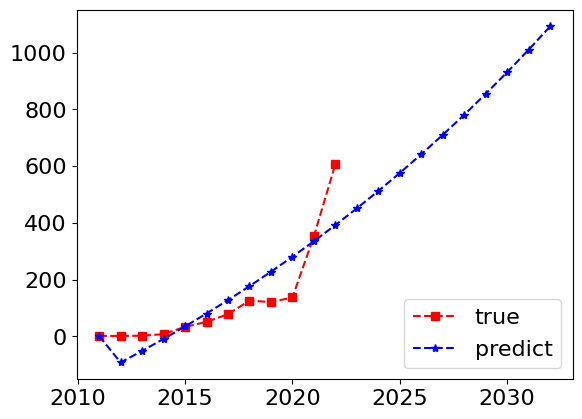

In [1529]:
t0 = np.arange(n) + s
t1 = t + s

plot(t0, x0, "s--", color="r", label="true")
plot(t1, x0_pred, "*--", color="b", label="predict")
legend(loc="lower right")
show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [10]:
x_data = np.array([0.039,0.058,0.2,0.3,0.5,0.8,1.2,2,2.0001])
y_data = np.array([71.2,73.7,77.3,79.7,81.3,85.6,85.1,83.6,79.3])

In [11]:
cubic = CubicSpline(x_data, y_data)

In [12]:
x_inter = np.linspace(0, 11, 100)

In [13]:
y_inter = cubic(x_inter)

for i in range(10):
    print(list(y_inter[i * 12: (i+1) *12]))

[62.67560306741939, 76.73131475428758, 78.14685743984775, 77.02121270090156, 69.46645862510957, 110.46695751252335, 168.67778415692686, 119.60177930988442, -128.0299796170969, -389.9762295294297, -358.51122664581794, 273.65795614210384]
[1598.582630595077, 3228.081636495407, 4708.995212765738, 5588.163598328721, 5412.427032106994, 3728.625753023207, 83.6, -5975.809989006456, -14902.763979905329, -27150.42173957191, -43171.94303488164, -63420.48763270984]
[-88349.21529993185, -118411.28580342303, -154059.8589100587, -195748.09438671428, -243929.1520002648, -299056.1915175861, -361582.3727055533, -431960.8553310418, -510644.7991609267, -598087.3639620838, -694741.7095013882, -801060.9955457151]
[-917498.3818619401, -1044507.028216938, -1182540.0943775857, -1332050.740110756, -1493492.1251833271, -1667317.4093621718, -1853979.7524141665, -2053932.3141061878, -2267628.2542051086, -2495520.7324778074, -2738062.908691155, -2995707.9426120324]
[-3268908.9940073094, -3558119.2226438643, -38637

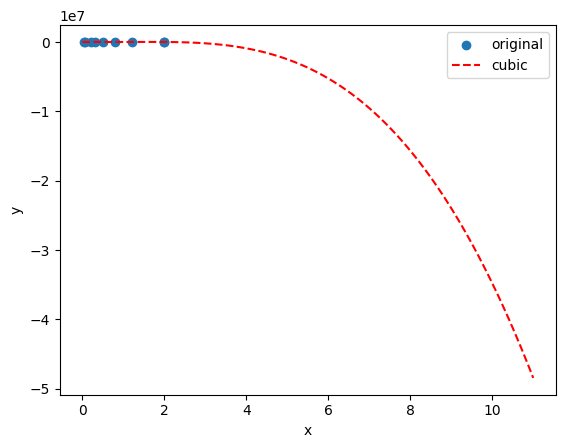

In [14]:
plt.scatter(x_data, y_data, label='original')
plt.plot(x_inter, y_inter, "--", label=f'cubic', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 生成示例数据
np.random.seed(42)
data = pd.DataFrame({
    'x1': np.random.rand(100),
    'x2': np.random.rand(100),
    'count': np.random.poisson(lam=5, size=100)
})

# 设计矩阵
X = data[['x1', 'x2']]
X = sm.add_constant(X)  # 添加常数项

# 目标变量
y = data['count']

# 拟合泊松回归模型
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# 打印模型摘要
print(poisson_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -219.21
Date:                Sun, 26 Nov 2023   Deviance:                       102.95
Time:                        09:33:15   Pearson chi2:                     97.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01340
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4751      0.118     12.496      0.0

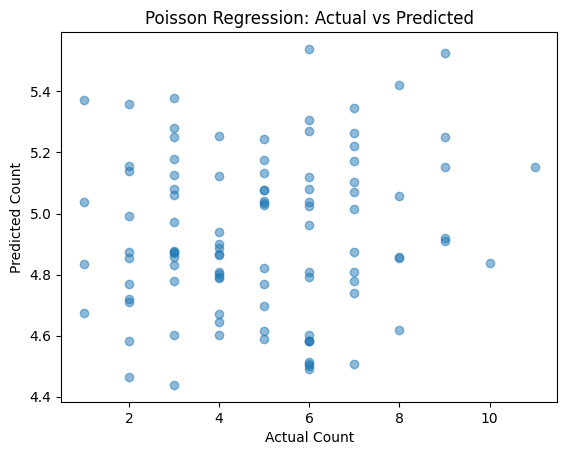

In [2]:
import matplotlib.pyplot as plt

# 预测目标变量
y_pred = poisson_results.predict(X)

# 绘制实际值与预测值的散点图
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Poisson Regression: Actual vs Predicted')
plt.show()


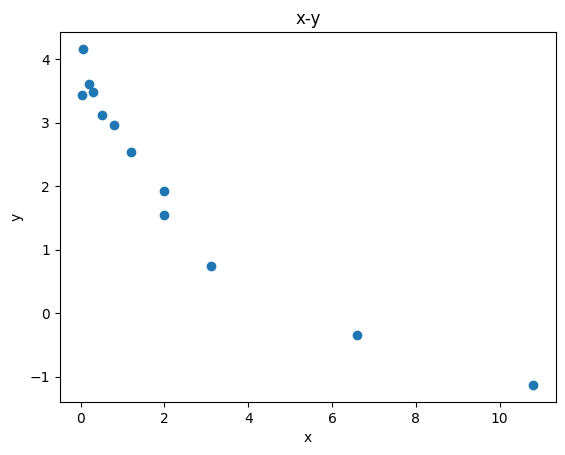

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0.039,0.058,0.2,0.3,0.5,0.8,1.2,2,2,3.1,6.6,10.8])
y_data = np.array([3.43,4.16,3.6,3.48,3.12,2.97,2.53,1.92,1.54,0.74,-0.35,-1.13])

plt.scatter(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x-y')
plt.show()

In [4]:
b = np.vstack([x_data, np.ones(12)]).T
print(b)

[[ 0.039  1.   ]
 [ 0.058  1.   ]
 [ 0.2    1.   ]
 [ 0.3    1.   ]
 [ 0.5    1.   ]
 [ 0.8    1.   ]
 [ 1.2    1.   ]
 [ 2.     1.   ]
 [ 2.     1.   ]
 [ 3.1    1.   ]
 [ 6.6    1.   ]
 [10.8    1.   ]]


In [5]:
# 最小二乘法拟合参数
u = np.linalg.pinv(b)@y_data
print(u)

[-0.47946305  3.27014514]


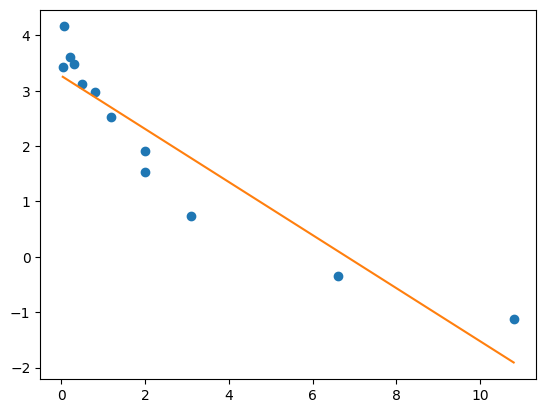

In [9]:
plt.plot(x_data, y_data, 'o')

m, b = np.polyfit(x_data, y_data, 1)

plt.plot(x_data, m * x_data + b)

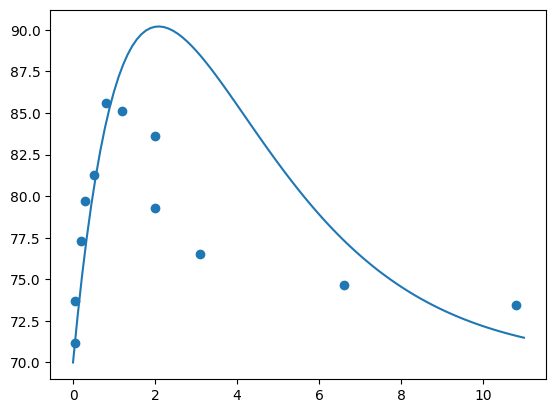

In [11]:
x_data = np.array([0.039,0.058,0.2,0.3,0.5,0.8,1.2,2,2,3.1,6.6,10.8])
y_data = np.array([71.2,73.7,77.3,79.7,81.3,85.6,85.1,83.6,79.3,76.5,74.67,73.48])

x = np.linspace(0, 11, 100)
y = 26.31 * x * np.exp(-0.479 * x) + 70

plt.scatter(x_data, y_data)
plt.plot(x, y)
plt.show()